##Linear Regession

This notebook I will explore Linear Regression from sctrach to understand the 

*   How to use the training data to estimate 
*   Understanding of linear co-efficient
*   Prediction from test data

I will take help from below links

https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/






Linear regression assumes a linear or straight line relationship between the input variables (X) and the single output variable (y).

More specifically, that output (y) can be calculated from a linear combination of the input variables (X). When there is a single input variable, the method is referred to as a simple linear regression.

In simple linear regression we can use statistics on the training data to estimate the coefficients required by the model to make predictions on new data.

The line for a simple linear regression model can be written as:
          
          y=b0+b1*x

where b0 and b1 are the coefficients we must estimate from the training data.

Once the coefficients are known, we can use this equation to estimate output values for y given new input examples of x.

Briefly, we can estimate the coefficients as follows:

  
    B1 = sum((x(i) - mean(x)) * (y(i) - mean(y))) / sum( (x(i) - mean(x))^2 )
    B0 = mean(y) - B1 * mean(x)

I will use insurance dataset of 10 records, where one varaible is age, another one is number of claims and predicted value will be charges

In [ ]:
ages=[19, 18, 28, 33, 32, 31, 46, 37, 37]
charges=[16.924, 1.5523, 4.462, 21.47061, 3.8552, 3.6216, 8.5896, 7.5056, 6.4107]
claims=[16, 1, 4, 21, 3, 3, 8, 7, 6]

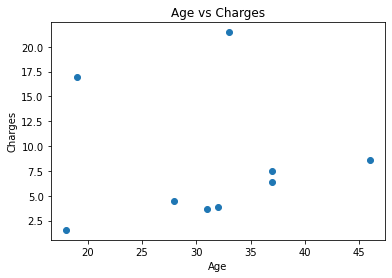

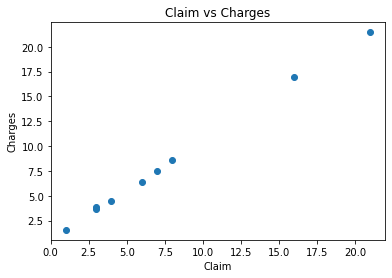

In [ ]:
## we will visulize for two varaible
import matplotlib.pyplot as plt
plt.scatter(ages,charges)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()

plt.scatter(claims,charges)
plt.xlabel('Claim')
plt.ylabel('Charges')
plt.title('Claim vs Charges')
plt.show()

### Calculate Mean and Variance

In [ ]:
## mean function

def mean(x):
  sums=0.0
  l=0.0
  for i in x:
    sums=i+sums
    l=l+1.0
  return sums/l
  
def variance(x, mean):
  sums=0
  for i in x:
    sums=sums+((i-mean)*(i-mean))

  return sums


In [ ]:
mean_age, mean_claim, mean_charges = mean(ages), mean(claims), mean(charges)
var_age, var_claim, var_charges = variance(ages, mean_age), variance(claims, mean_claim), variance(charges, mean_charges)
print('Age stats: mean=%.3f variance=%.3f' % (mean_age, var_age))
print('Claims stats: mean=%.3f variance=%.3f' % (mean_claim,  var_claim))
print('Charges stats: mean=%.3f variance=%.3f' % (mean_charges,  var_charges))


Age stats: mean=31.222 variance=623.556
Claims stats: mean=7.667 variance=352.000
Charges stats: mean=8.266 variance=354.018


### Calculate Covariance



The covariance of two groups of numbers describes how those numbers change together.

Covariance is a generalization of correlation. Correlation describes the relationship between two groups of numbers, whereas covariance can describe the relationship between two or more groups of numbers.

Additionally, covariance can be normalized to produce a correlation value.

Nevertheless, we can calculate the covariance between two variables as follows:

    covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))

In [ ]:
def covariance(x, mean_x, y, mean_y):
  if(len(x)!=len(y)):
    print("Sample Size is not equal")
    return 0
  else:
    sums=0
    for i in range(len(x)):
      sums=sums+((x[i]-mean_x)/(y[i]-mean_y))
    return sums

In [ ]:
covariance(ages, mean_age, charges, mean_charges)

36.32486529735663

### Estimate Coefficient

As above section we can see the B1 equation was
    
    B1 = sum((x(i) - mean(x)) * (y(i) - mean(y))) / sum( (x(i) - mean(x))^2 )

We can simplfy the equation using

    B1 = cov(x,y)/ var(x)
    B0 = mean(y) - B1 * mean(x)

In [ ]:
def coefficient(x, y):
  x_mean = mean(x)
  y_mean = mean(y)
  B1 = covariance(x, x_mean, y, y_mean)/variance(x, x_mean)

  B0 = mean(y) - (B1*mean(x))

  return B0, B1

In [ ]:
coefficient(ages, charges)

(6.4469020943807935, 0.05825441690595327)

###Prediction

The simple linear regression model is a line defined by coefficients estimated from training data.

Once the coefficients are estimated, we can use them to make predictions.

The equation to make predictions with a simple linear regression model is as follows:

    y = b0 + b1 * x

In [ ]:
def prediction(train, test):
  x=train[0]
  y=train[1]
  b0, b1 = coefficient(x,y)

  predictions = []
  for row in test[0]:
    yhat = b0 + b1 * row
    predictions.append(yhat)
  
  return predictions


to make prediction creating test cases and stacking into one numpy array

In [ ]:
test_ages=[60, 25, 62, 23, 56]
test_charges=[28.13692, 2.3208, 27.7251, 1.843, 11.7178]
test_claims=[28,2,27,1,11]

In [ ]:
import numpy as np
train = np.stack((ages, charges))
test = np.stack((test_ages, test_charges))
prediction(train, test)

[9.94216710873799,
 7.903262517029625,
 10.058675942549897,
 7.786753683217719,
 9.709149441114176]

### Evaluate 

using mean rmse squre root error

In [ ]:
# Standalone simple linear regression example
from math import sqrt
 
# Calculate root mean squared error
def rmse_metric(actual, predicted):
 sum_error = 0.0
 for i in range(len(actual)):
  prediction_error = predicted[i] - actual[i]
  sum_error += (prediction_error ** 2)
 mean_error = sum_error / float(len(actual))
 return sqrt(mean_error)
 
# Evaluate regression algorithm on training dataset
def evaluate_algorithm(train,test):
 
 predicted=prediction(train, test)
 print(rmse_metric(test[1],predicted))
 

In [ ]:
evaluate_algorithm(train,test)

11.947203391758729


### Putting it all together for another variable

In [ ]:
from math import sqrt
import numpy as np

def mean(x):
  sums=0.0
  l=0.0
  for i in x:
    sums=i+sums
    l=l+1.0
  return sums/l
  
def variance(x, mean):
  sums=0
  for i in x:
    sums=sums+((i-mean)*(i-mean))

  return sums

def covariance(x, mean_x, y, mean_y):
  if(len(x)!=len(y)):
    print("Sample Size is not equal")
    return 0
  else:
    sums=0
    for i in range(len(x)):
      sums=sums+((x[i]-mean_x)*(y[i]-mean_y))
    
    return sums

def coefficient(x, y):
  x_mean = mean(x)
  y_mean = mean(y)
  print("corr",covariance(x, x_mean, y, y_mean))
  print("varaince",variance(x, x_mean))
  B1 = covariance(x, x_mean, y, y_mean)/variance(x, x_mean)

  B0 = mean(y) - (B1*mean(x))

  return B0, B1

def prediction(train, test):
  x=train[0]
  y=train[1]
  b0, b1 = coefficient(x,y)
  print("coef, intercept, ", b0,b1)
  predictions = []
  for row in test[0]:
    yhat = b0 + b1 * row
    predictions.append(yhat)
  
  return predictions

def rmse_metric(actual, predicted):
 sum_error = 0.0
 for i in range(len(actual)):
  prediction_error = predicted[i] - actual[i]
  sum_error += (prediction_error ** 2)
 mean_error = sum_error / float(len(actual))
 return sqrt(mean_error)
 

def evaluate_algorithm(y_true,y_pred): 
 
 return rmse_metric(test[1], y_pred)

In [ ]:
train = np.stack((ages, charges))
test = np.stack((test_ages, test_charges))
predicted=prediction(train, test)
print("rmse",evaluate_algorithm(test[1],predicted))


corr 5.952851111111139
varaince 623.5555555555554
coef, intercept,  7.967667594440485 0.009546625089094844
rmse 12.934971908683014


re-checking with the builtin sklearn libraries

In [ ]:
from sklearn.linear_model import LinearRegression
X=train[0].reshape(-1,1)
Y=train[1].reshape(-1,1)
reg = LinearRegression().fit(X, Y)
predicted=reg.predict(test[0].reshape(-1,1))
print("rmse",evaluate_algorithm(test[1],predicted))

rmse 12.934971908683016


In [ ]:
train = np.stack((claims, charges))
test = np.stack((test_claims, test_charges))
predicted=prediction(train, test)
print("rmse",evaluate_algorithm(test[1],predicted))

corr 352.8820333333333
varaince 351.99999999999994
coef, intercept,  0.5798568244949491 1.0025057765151517
rmse 0.28952980495788494


In [ ]:
from sklearn.linear_model import LinearRegression
X=train[0].reshape(-1,1)
Y=train[1].reshape(-1,1)
reg = LinearRegression().fit(X, Y)
predicted=reg.predict(test[0].reshape(-1,1))
print("rmse",evaluate_algorithm(test[1],predicted))
print("coef",reg.coef_)
print("intercept",reg.intercept_)

rmse 0.2895298049578821
coef [[1.00250578]]
intercept [0.57985682]


###Interview Question

###1. What are the important assumptions of Linear regression?

A linear relationship Restricted Multi-collinearity value Homoscedasticity

Firstly, there has to be a linear relationship between the dependent and the independent variables. To check this relationship, a scatter plot proves to be useful.

Secondly, there must no or very little multi-collinearity between the independent variables in the dataset. The value needs to be restricted, which depends on the domain requirement.

The third is the homoscedasticity. It is one of the most important assumptions which states that the errors are equally distributed.

###2. What is Homoscedasticity?


Homoscedasticity, or homogeneity of variances, is an assumption of equal or similar variances in different groups being compared. This is an important assumption of parametric statistical tests because they are sensitive to any dissimilarities. Uneven variances in samples result in biased and skewed test results.

###3. What is heteroscedasticity?

Heteroscedasticity is exactly the opposite of homoscedasticity, which means that the error terms are not equally distributed. To correct this phenomenon, usually, a log function is used.

##4. What is the difference between R square and adjusted R square?

In linear regression, you use both these values for model validation. However, there is a clear distinction between the two. R square accounts for the variation of all independent variables on the dependent variable. In other words, it considers each independent variable for explaining the variation. In the case of Adjusted R square, it accounts for the significant variables alone for indicating the percentage of variation in the model. By significant, we refer to the P values less than 0.05.

###5. What are the possible ways of improving the accuracy of a linear regression model?

There could be multiple ways of improving the accuracy of a linear regression, most commonly used ways are as follows:

Outlier Treatment:
-Regression is sensitive to outliers, hence it becomes very important to treat the outliers with appropriate values. Replacing the values with mean, median, mode or percentile depending on the distribution can prove to be useful.

###6. What are the disadvantages of the linear model?

– Linear regression is sensitive to outliers which may affect the result.

– Over-fitting

– Under-fitting

### 7. How do you interpret a Q-Q plot in a linear regression model?

As the name suggests, the Q-Q plot is a graphical plotting of the quantiles of two distributions with respect to each other. In other words, you plot quantiles against quantiles.

Whenever you interpret a Q-Q plot, you should concentrate on the ‘y = x’ line. You also call it the 45-degree line in statistics. It entails that each of your distributions has the same quantiles. In case you witness a deviation from this line, one of the distributions could be skewed when compared to the other.

###8.    What is the importance of the F-test in a linear model?
The F-test is a crucial one in the sense that it tests the goodness of the model. When you reiterate the model to improve the accuracy with the changes, the F-test proves its utility in understanding the effect of the overall regression.